## Module 10 - Case study 3

1.Load the file “zoo.data” and look at the info and first five rows. The first column denotes the animal name and the last one specifies a high-level class for the corresponding animal.

2. Find out the unique number of high level class.

3. Use the 16-intermediate feature and perform an agglomerative clustering.

[ Hint: Refer to the agglomerative clustering module in scikit learn and set the number of clusters appropriately]

4. Compute the mean squared error by comparing the actual class and predicted high level class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\sreeraj.va\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.Load the file “zoo.data” and look at the info and first five rows. The first column denotes the animal name and the last one specifies a high-level class for the corresponding animal.

In [2]:
df = pd.read_csv(r'D:\E\Courses\Edureka\Assignments\Dataset\module10\zoo.csv')

In [4]:
print(df.shape)
df.head()

(101, 18)


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


2. Find out the unique number of high level class.

In [7]:
print(df['class_type'].unique())
len(df['class_type'].unique())

[1 4 2 7 6 5 3]


7

3. Use the 16-intermediate feature and perform an agglomerative clustering.

In [11]:
x = df.iloc[:, 1:17].values

In [12]:
# using dendrogram to decide the number of clusters.

import scipy.cluster.hierarchy as sch

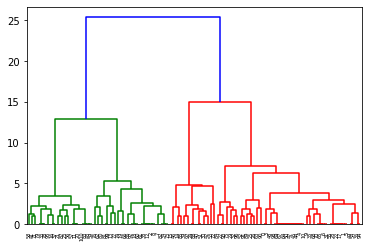

In [13]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

In [14]:
# going with a 7 group clustering

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

In [15]:
y_hc

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 6, 0, 0, 3, 1, 2, 2, 3, 3,
       1, 3, 0, 5, 5, 4, 1, 4, 0, 1, 4, 3, 2, 1, 1, 3, 2, 0, 0, 3, 0, 3,
       1, 1, 0, 1, 1, 1, 1, 0, 5, 0, 1, 1, 3, 3, 3, 3, 2, 2, 6, 5, 1, 1,
       2, 1, 1, 1, 1, 3, 0, 2, 2, 4, 6, 6, 3, 3, 6, 6, 2, 3, 4, 0, 2, 3,
       0, 5, 5, 5, 2, 4, 1, 3, 4, 0, 1, 6, 3], dtype=int64)

In [16]:
pd.concat([df, pd.DataFrame(y_hc)], axis=1)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,0
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,2
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,4
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,0
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,6


In [29]:
from sklearn.metrics import silhouette_score

silhouette_score(x, y_hc)

0.4278369232052452

4. Compute the mean squared error by comparing the actual class and predicted high level class.

In [24]:
df_compare = pd.concat([df, pd.DataFrame(y_hc)], axis=1).iloc[:, -2:]

In [26]:
df_compare.columns = ['class_type', 'class_type_pred']

In [27]:
df_compare['class_type'] = df_compare['class_type']-1

In [28]:
df_compare

,class_type,class_type_pred
0,0,1
1,0,1
2,3,2
3,0,1
4,0,1
...,...,...
96,0,4
97,5,0
98,0,1
99,6,6


In [30]:
df_compare['rse'] = ((df_compare['class_type'] - df_compare['class_type_pred'])**2)**0.5

In [34]:
mse = df_compare['rse'].mean()
mse

2.1782178217821784